In [2]:
import jax
import jax.numpy as jnp
import numpy as np
from jax import grad,jit,vmap
#import tensorflow as tf
import matplotlib.pyplot as py
#tf.config.experimental.set_visible_devices([], "GPU")

mnist data

In [3]:
#(train_data,_),(_,_)=tf.keras.datasets.mnist.load_data()

Data

In [4]:
#consider a function that has to decide to darken only lit pixels down by 0.5 units only if they are a value >0.9 

image1= np.ones((28,28)) *0.5

for i in range(2,22): 
  for j in range (2,22): 
    image1[i][j]=1

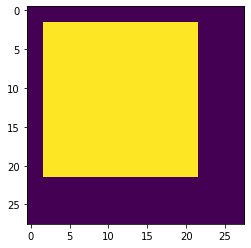

In [5]:
py.imshow(image1)

Target

In [6]:
target= np.zeros((28,28))
for i in range(2,22): 
  for j in range (2,22): 
    target[i][j]=10

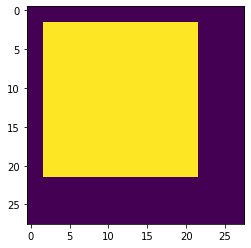

In [7]:
py.imshow(target)

Reshaping for using in NN

In [8]:
feature=image1.reshape(784,1)
target=target.reshape(784,1)
kernel = 10

In [9]:
def forward(pixels,parameters,bias):  #parameters will be 1,1 
  layer1=jnp.dot(pixels,parameters[0].T) + bias[0]  #(32,1) 
  layer1=jax.nn.relu(layer1) 
  layer2=jnp.dot(layer1,parameters[1].T)+bias[1]  #(1,32)
  layer2=jax.nn.sigmoid(layer2) 
  output=kernel * pixels * layer2

  return output

vmap_forward= vmap(forward, in_axes =(0,None,None))

def MSE_error(pixels_,target,parameters,bias): 
  pred = forward(pixels_,parameters,bias) 
  error = 0.5*(target-pred)**2 #sum over image
  return error[0]

gradient=grad(MSE_error, argnums=(2,3))

def update_params(dparams,dbias,parameters,bias,lr=0.001): 
  for i in range(len(dparams)):
    parameters[i]=parameters[i] - (lr*dparams[i])
    bias[i] = bias[i] - (lr*dbias[i]) 
  return [parameters,bias]

Parameters

In [33]:
np.random.seed(1005)
parameters=[]
bias=[]
parameters.append(np.random.randn(5,1)) 
parameters.append(np.random.randn(1,5))
bias.append(np.random.randn(5))
bias.append(np.random.randn(1))

In [34]:

for epoch in range(30): 
  for sample in range(784): 
    dparam,dbias =jit(gradient)(feature[sample],target[sample],parameters,bias)
    parameters,bias=jit(update_params)(dparam,dbias,parameters,bias,lr=0.1)
  print(MSE_error(feature[23],target[23],parameters,bias))

12.499828
12.4997835
12.499712
12.499574
12.499211
12.496119
12.492041
12.499933
12.499928
12.499919
12.499914
12.499903
12.49989
12.499876
12.499852
12.499822
12.499776
12.499702
12.499561
12.499194
12.496279
0.011269453
0.0049126586
0.0030897423
0.0022422343
0.0017556265
0.0014409745
0.0012209489
0.0010586468
0.00093407463


In [35]:
final=vmap_forward(feature,parameters,bias)

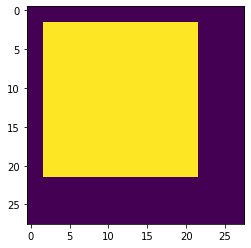

In [36]:
py.imshow(final.reshape(28,28))

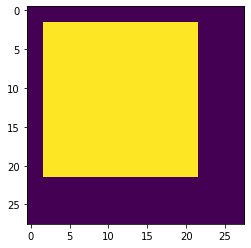

In [37]:
py.imshow(target.reshape(28,28))


In [38]:
data=[]
for i in range(10): 
  data.append(forward (i/10,parameters,bias)[0])

data=np.array(data)

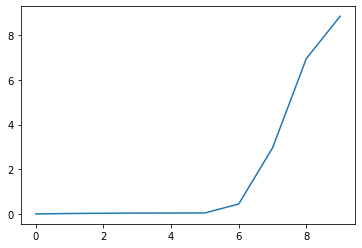

In [39]:
py.plot(data.reshape(10))

In [40]:
#modified=forward(train_data[5].reshape(784,1)/255.0,parameters,bias)
#py.imshow(modified.reshape(28,28))

In [41]:
#py.imshow(train_data[5].reshape(28,28))